In [5]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

In [11]:
dataset = pd.read_excel("CO2_XDATCAR.xlsx")
dataset = dataset.fillna(0)

In [12]:
#Lattice Parameters in Angstrom
a = (dataset.iloc[[0], :]).values.tolist()[0][0]
b = (dataset.iloc[[1], :]).values.tolist()[0][1]
c = (dataset.iloc[[2], :]).values.tolist()[0][2]

#atoms and number of atoms
atom = (dataset.iloc[[3], :]).values.tolist()[0]

number_of_atom = (dataset.iloc[[4], :]).values.tolist()[0]

#coordinates

X = (dataset.iloc[5:,[0]]).values.tolist()
Y = (dataset.iloc[5:,[1]]).values.tolist()
Z = (dataset.iloc[5:,[2]]).values.tolist()

if (len(X) != len(Y)):
    print("Check Input File. Coordinates missing/extra!")


if (len(X) != len(Z)):
    print("Check Input File. Coordinates missing/extra!")

#Frames in dynamic simualtion
number_of_frames = math.floor(len(X)/sum(number_of_atom))

#atom numbers for tracking the bond distance
atom_number_one = 0
atom_number_two = 100
atom_number_three = 101

In [13]:
periodic_distance1 = [[[0 for k in range(3)] for j in range(3)] for i in range(3)]
periodic_distance2 = [[[0 for k in range(3)] for j in range(3)] for i in range(3)]
periodic_distance3 = [[[0 for k in range(3)] for j in range(3)] for i in range(3)]
angle =     []
avg_angle = []

for frames in range(number_of_frames):
    x_atom1, y_atom1, z_atom1 = X[frames*sum(number_of_atom) + atom_number_one][0], Y[frames*sum(number_of_atom) + atom_number_one][0], Z[frames*sum(number_of_atom) + atom_number_one][0]
    x_atom2, y_atom2, z_atom2 = X[frames*sum(number_of_atom) + atom_number_two][0], Y[frames*sum(number_of_atom) + atom_number_two][0], Z[frames*sum(number_of_atom) + atom_number_two][0]
    x_atom3, y_atom3, z_atom3 = X[frames*sum(number_of_atom) + atom_number_three][0], Y[frames*sum(number_of_atom) + atom_number_three][0], Z[frames*sum(number_of_atom) + atom_number_three][0]
    for m in range(-1, 2):
        for n in range(-1, 2):
            for o in range(-1, 2):
                periodic_distance1[m+1][n+1][o+1] = math.dist((x_atom1*a, y_atom1*b, z_atom1*c), ((x_atom2 + m)*a, (y_atom2 + n)*b, (z_atom2 + o)*c))
                periodic_distance2[m+1][n+1][o+1] = math.dist((x_atom2*a, y_atom2*b, z_atom2*c), ((x_atom3 + m)*a, (y_atom3 + n)*b, (z_atom3 + o)*c))
                periodic_distance3[m+1][n+1][o+1] = math.dist((x_atom3*a, y_atom3*b, z_atom3*c), ((x_atom1 + m)*a, (y_atom1 + n)*b, (z_atom1 + o)*c))
    distance1 = min(min(min(periodic_distance1)))
    distance2 = min(min(min(periodic_distance2)))
    distance3 = min(min(min(periodic_distance3)))
    angle += [math.degrees(math.acos(((distance1**2) + (distance3**2) - (distance2**2))/(2*distance1*distance3)))]
    avg_angle += [sum(angle)/len(angle)]
    

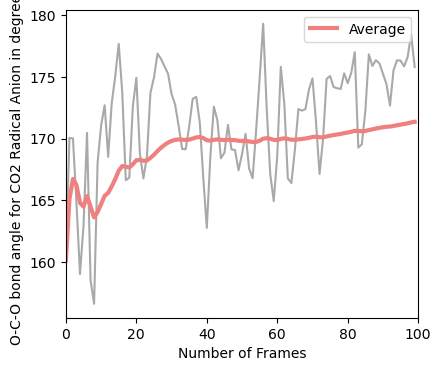

In [14]:
fig = plt.figure(figsize=(10, 4))

fig = plt.subplot(1, 2, 1)
plt.plot(angle, color = "darkgrey")
plt.plot(avg_angle, "lightcoral", label = "Average", linewidth = 3)
plt.xlabel('Number of Frames')
plt.xlim([0, number_of_frames])
plt.ylabel('O-C-O bond angle for CO2 Radical Anion in degrees ')
plt.legend(loc="upper right")